In [1]:
from music21 import *
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
def read_midi(file_name):
    print(f"Reading midi file {file_name}...")

    notes = []
    note_to_parse = None

    midi_stream = converter.parse(file_name)

    # grouping notes by instrument
    s2 = instrument.partitionByInstrument(midi_stream)

    for part in s2.parts:
        # select only piano for main melody
        if "Piano" in str(part):
            note_to_parse = part.recurse()
            for element in note_to_parse:
                if isinstance(element, note.Note):
                    notes.append(element)
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes


In [3]:
dataset_path = "./data/schubert"
data_files = [f for f in os.listdir(dataset_path) if f.endswith(".mid")]
notes_array = np.array([read_midi(os.path.join(dataset_path, f)) for f in data_files])
notes_in_file = [element for note in notes_array for element in note]


Reading midi file ./data/schubert/schumm-1.mid...
Reading midi file ./data/schubert/schumm-2.mid...
Reading midi file ./data/schubert/schub_d960_4.mid...
Reading midi file ./data/schubert/schumm-3.mid...
Reading midi file ./data/schubert/schub_d960_1.mid...
Reading midi file ./data/schubert/schumm-6.mid...
Reading midi file ./data/schubert/schumm-4.mid...
Reading midi file ./data/schubert/schub_d960_2.mid...
Reading midi file ./data/schubert/schub_d960_3.mid...
Reading midi file ./data/schubert/schumm-5.mid...
Reading midi file ./data/schubert/schuim-4.mid...
Reading midi file ./data/schubert/schuim-1.mid...
Reading midi file ./data/schubert/schuim-3.mid...
Reading midi file ./data/schubert/schuim-2.mid...
Reading midi file ./data/schubert/schubert_D850_4.mid...
Reading midi file ./data/schubert/schubert_D935_4.mid...
Reading midi file ./data/schubert/schub_d760_4.mid...
Reading midi file ./data/schubert/schubert_D850_1.mid...
Reading midi file ./data/schubert/schubert_D935_1.mid...
Re

/var/folders/xp/zl8ny92n1_3c5s3l9l4w44340000gn/T/ipykernel_19296/2406850670.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(os.path.join(dataset_path, f)) for f in data_files])


In [4]:
used_notes = list(sorted({str(n) for n in notes_in_file}))
print(f"Used notes: {len(used_notes)}")
print(f"Total notes: {len(notes_in_file)}")


Used notes: 282
Total notes: 81443


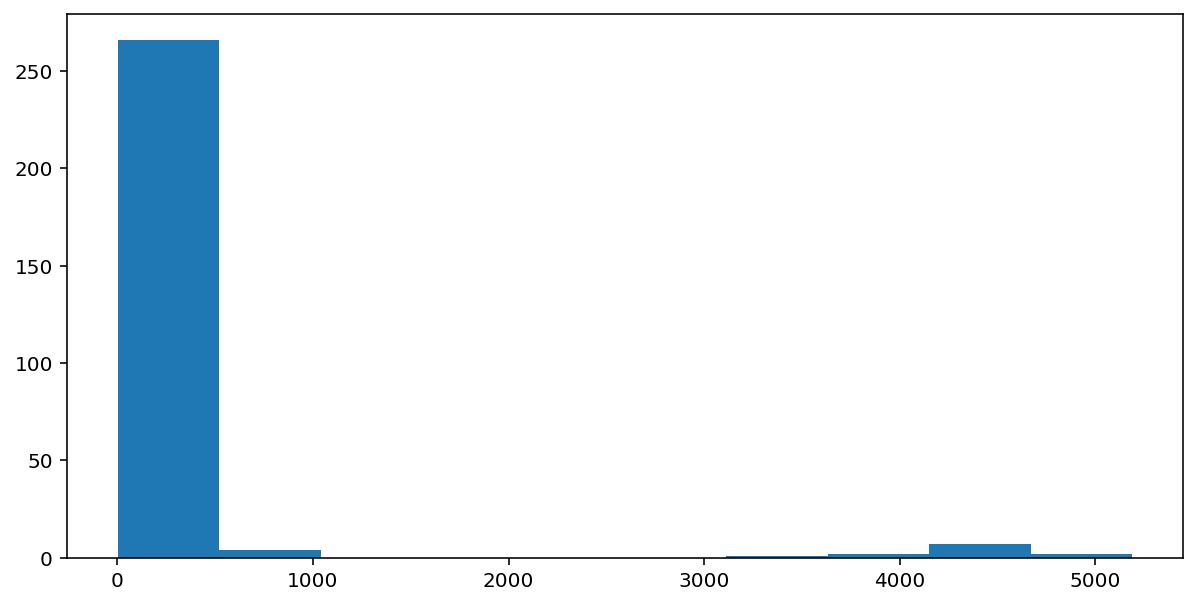

In [5]:
notes_freq = dict(Counter([str(n) for n in notes_in_file]))
freq_counts = [count for note, count in notes_freq.items()]

fig = plt.figure(figsize=(10, 5))
plt.hist(freq_counts)
plt.show()


(101, 1001)


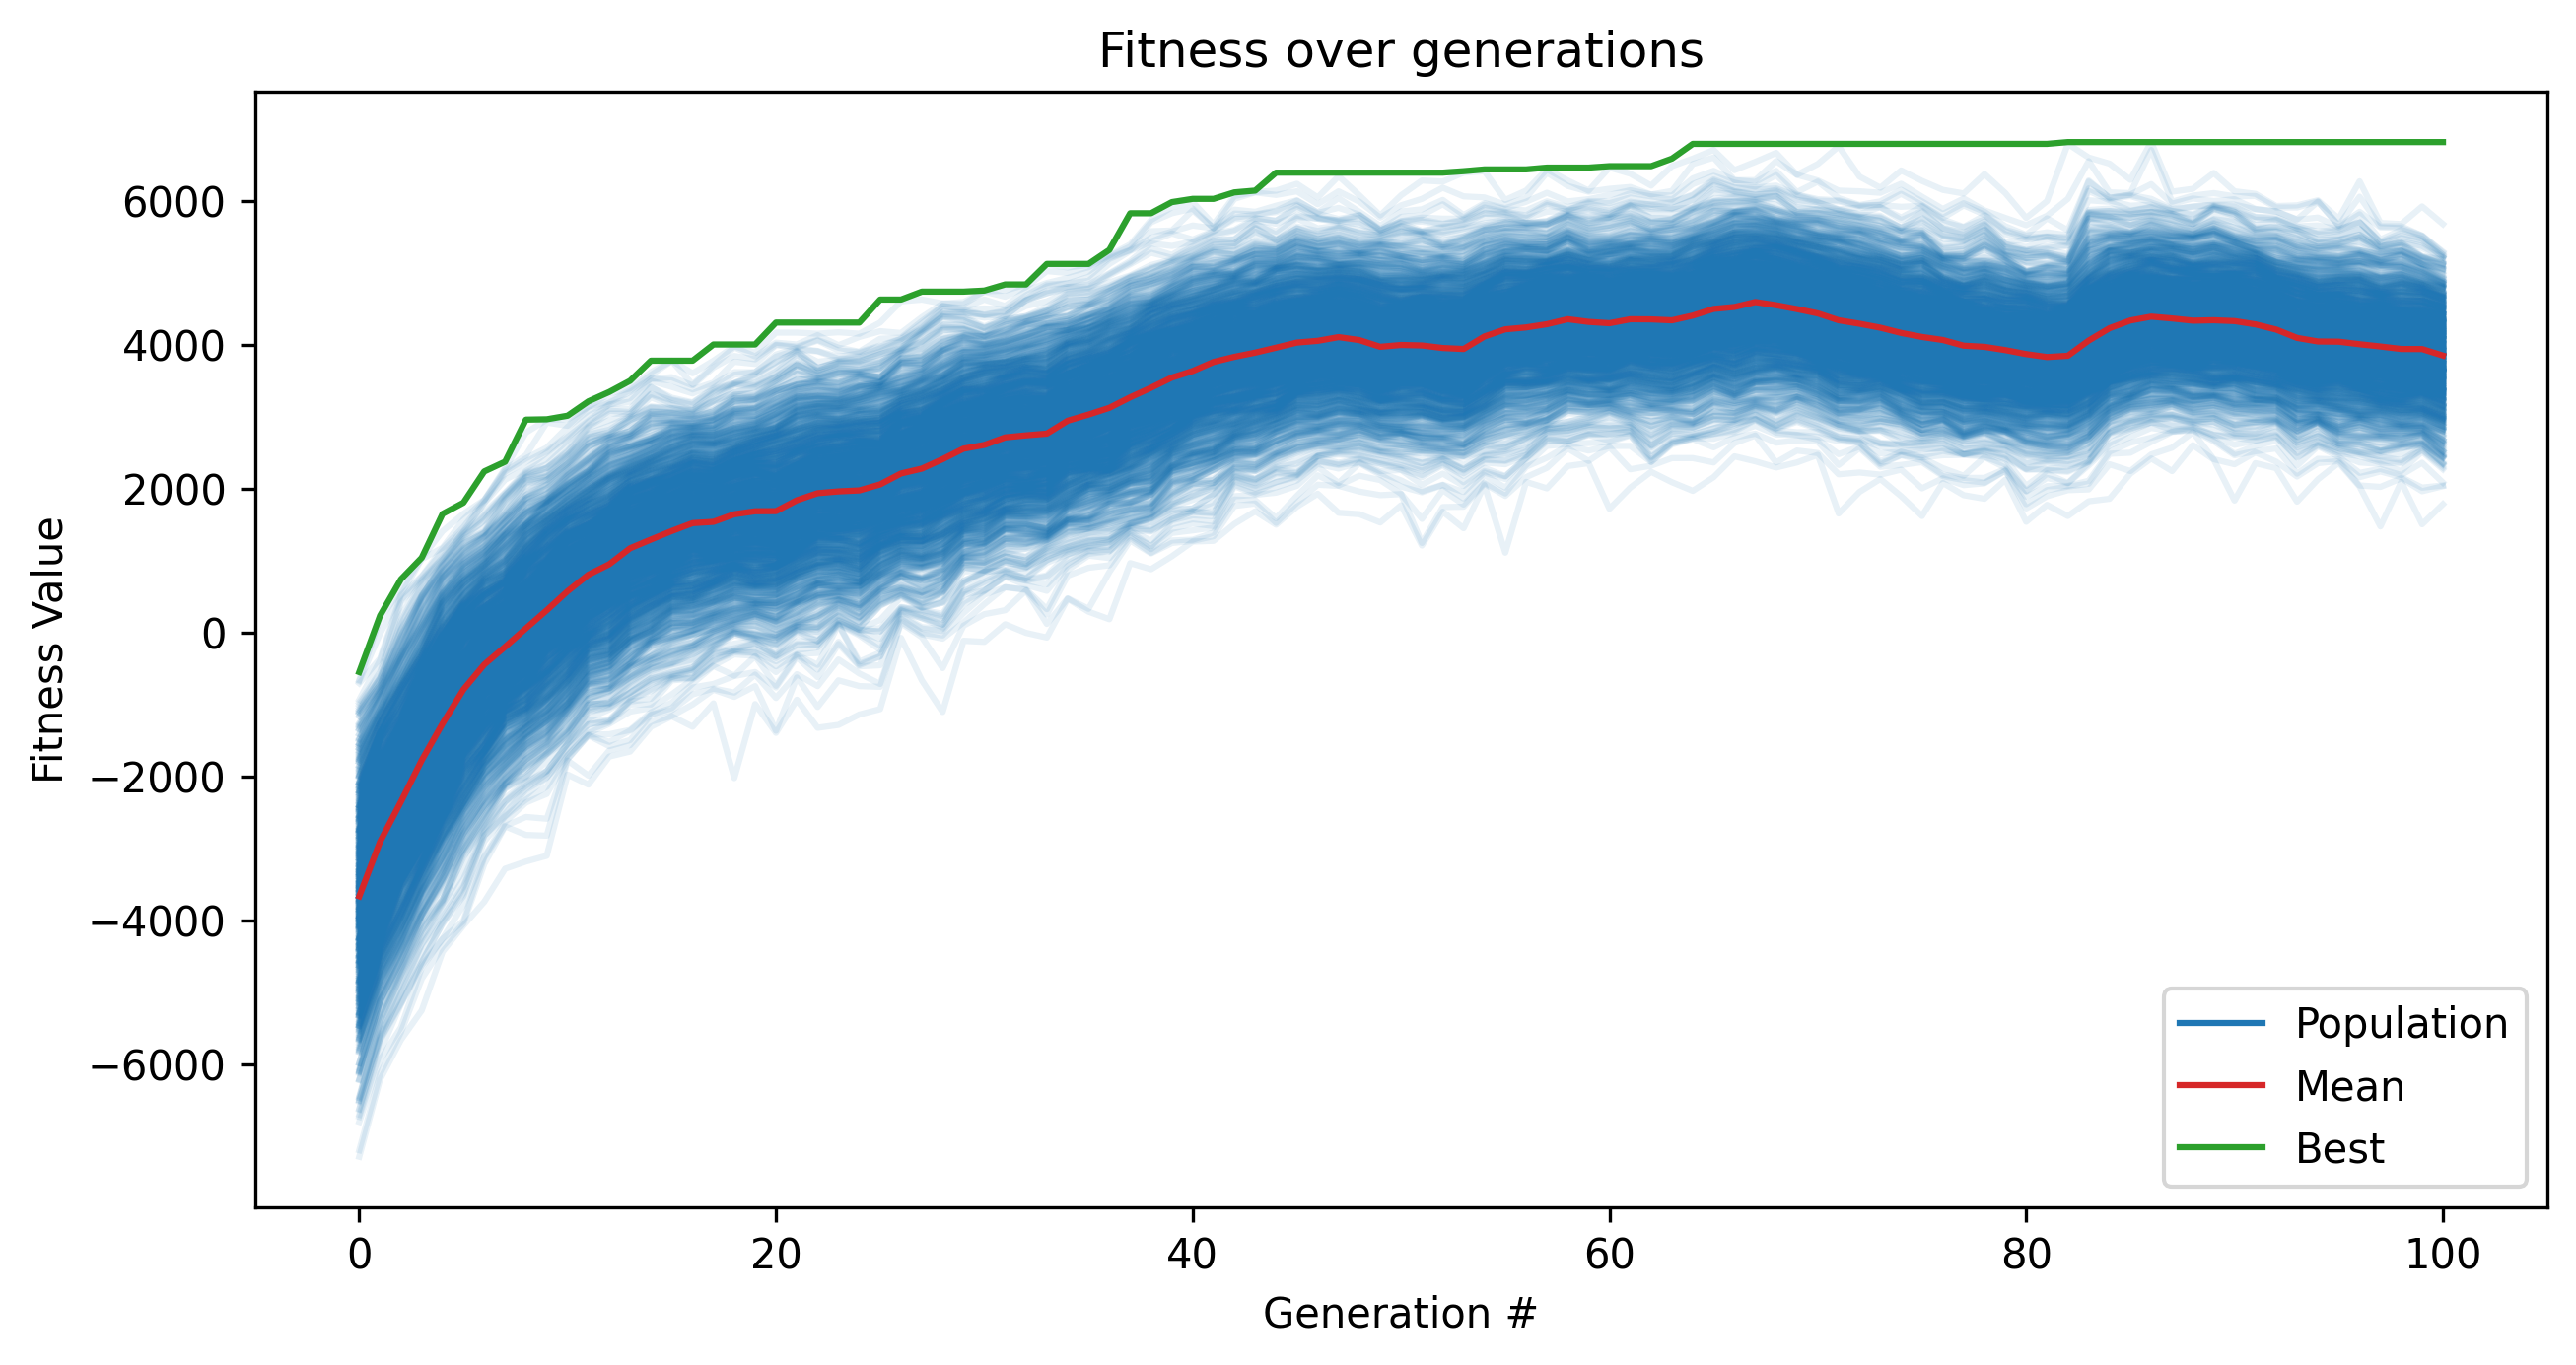

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df: pd.DataFrame = pd.read_csv("./fitness_data.csv", header=None)
df.dropna(axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
data = df.to_numpy()
print(data.shape)
fig = plt.figure(figsize=(10, 5), dpi=300)
plt.plot(data, alpha=0.1, color="tab:blue")
plt.plot(data.mean(axis=1), color="tab:blue", label="Population")
plt.plot(data.mean(axis=1), color="tab:red", label="Mean")
plt.plot(data[:, 0], color="tab:green", label="Best")
plt.xlabel("Generation #")
plt.ylabel("Fitness Value")
plt.title("Fitness over generations")
plt.legend(loc="lower right")
plt.savefig("fitness_over_generations.png")
plt.show()


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dirRoot = "./generated"
dirList = [dirName for dirName in os.listdir(dirRoot) if not dirName.startswith(".")]
last_iter_fitness = {}
for dirName in dirList:
    fileList = [
        fileName
        for fileName in os.listdir(os.path.join(dirRoot, dirName))
        if not fileName.startswith(".") and fileName.endswith(".csv")
    ]
    last_iter_fitness[dirName] = []
    for fileName in fileList:
        df: pd.DataFrame = pd.read_csv(
            os.path.join(dirRoot, dirName, fileName), header=None
        )
        df.dropna(axis=1, inplace=True)
        df.dropna(axis=0, inplace=True)
        data = df.to_numpy()[-1, :]
        last_iter_fitness[dirName].append(data)
last_iter_fitness = {k: np.array(v) for k, v in last_iter_fitness.items()}
# last_iter_fitness
best_fitness = {k: v[:, 0] for k, v in last_iter_fitness.items()}
# best_fitness


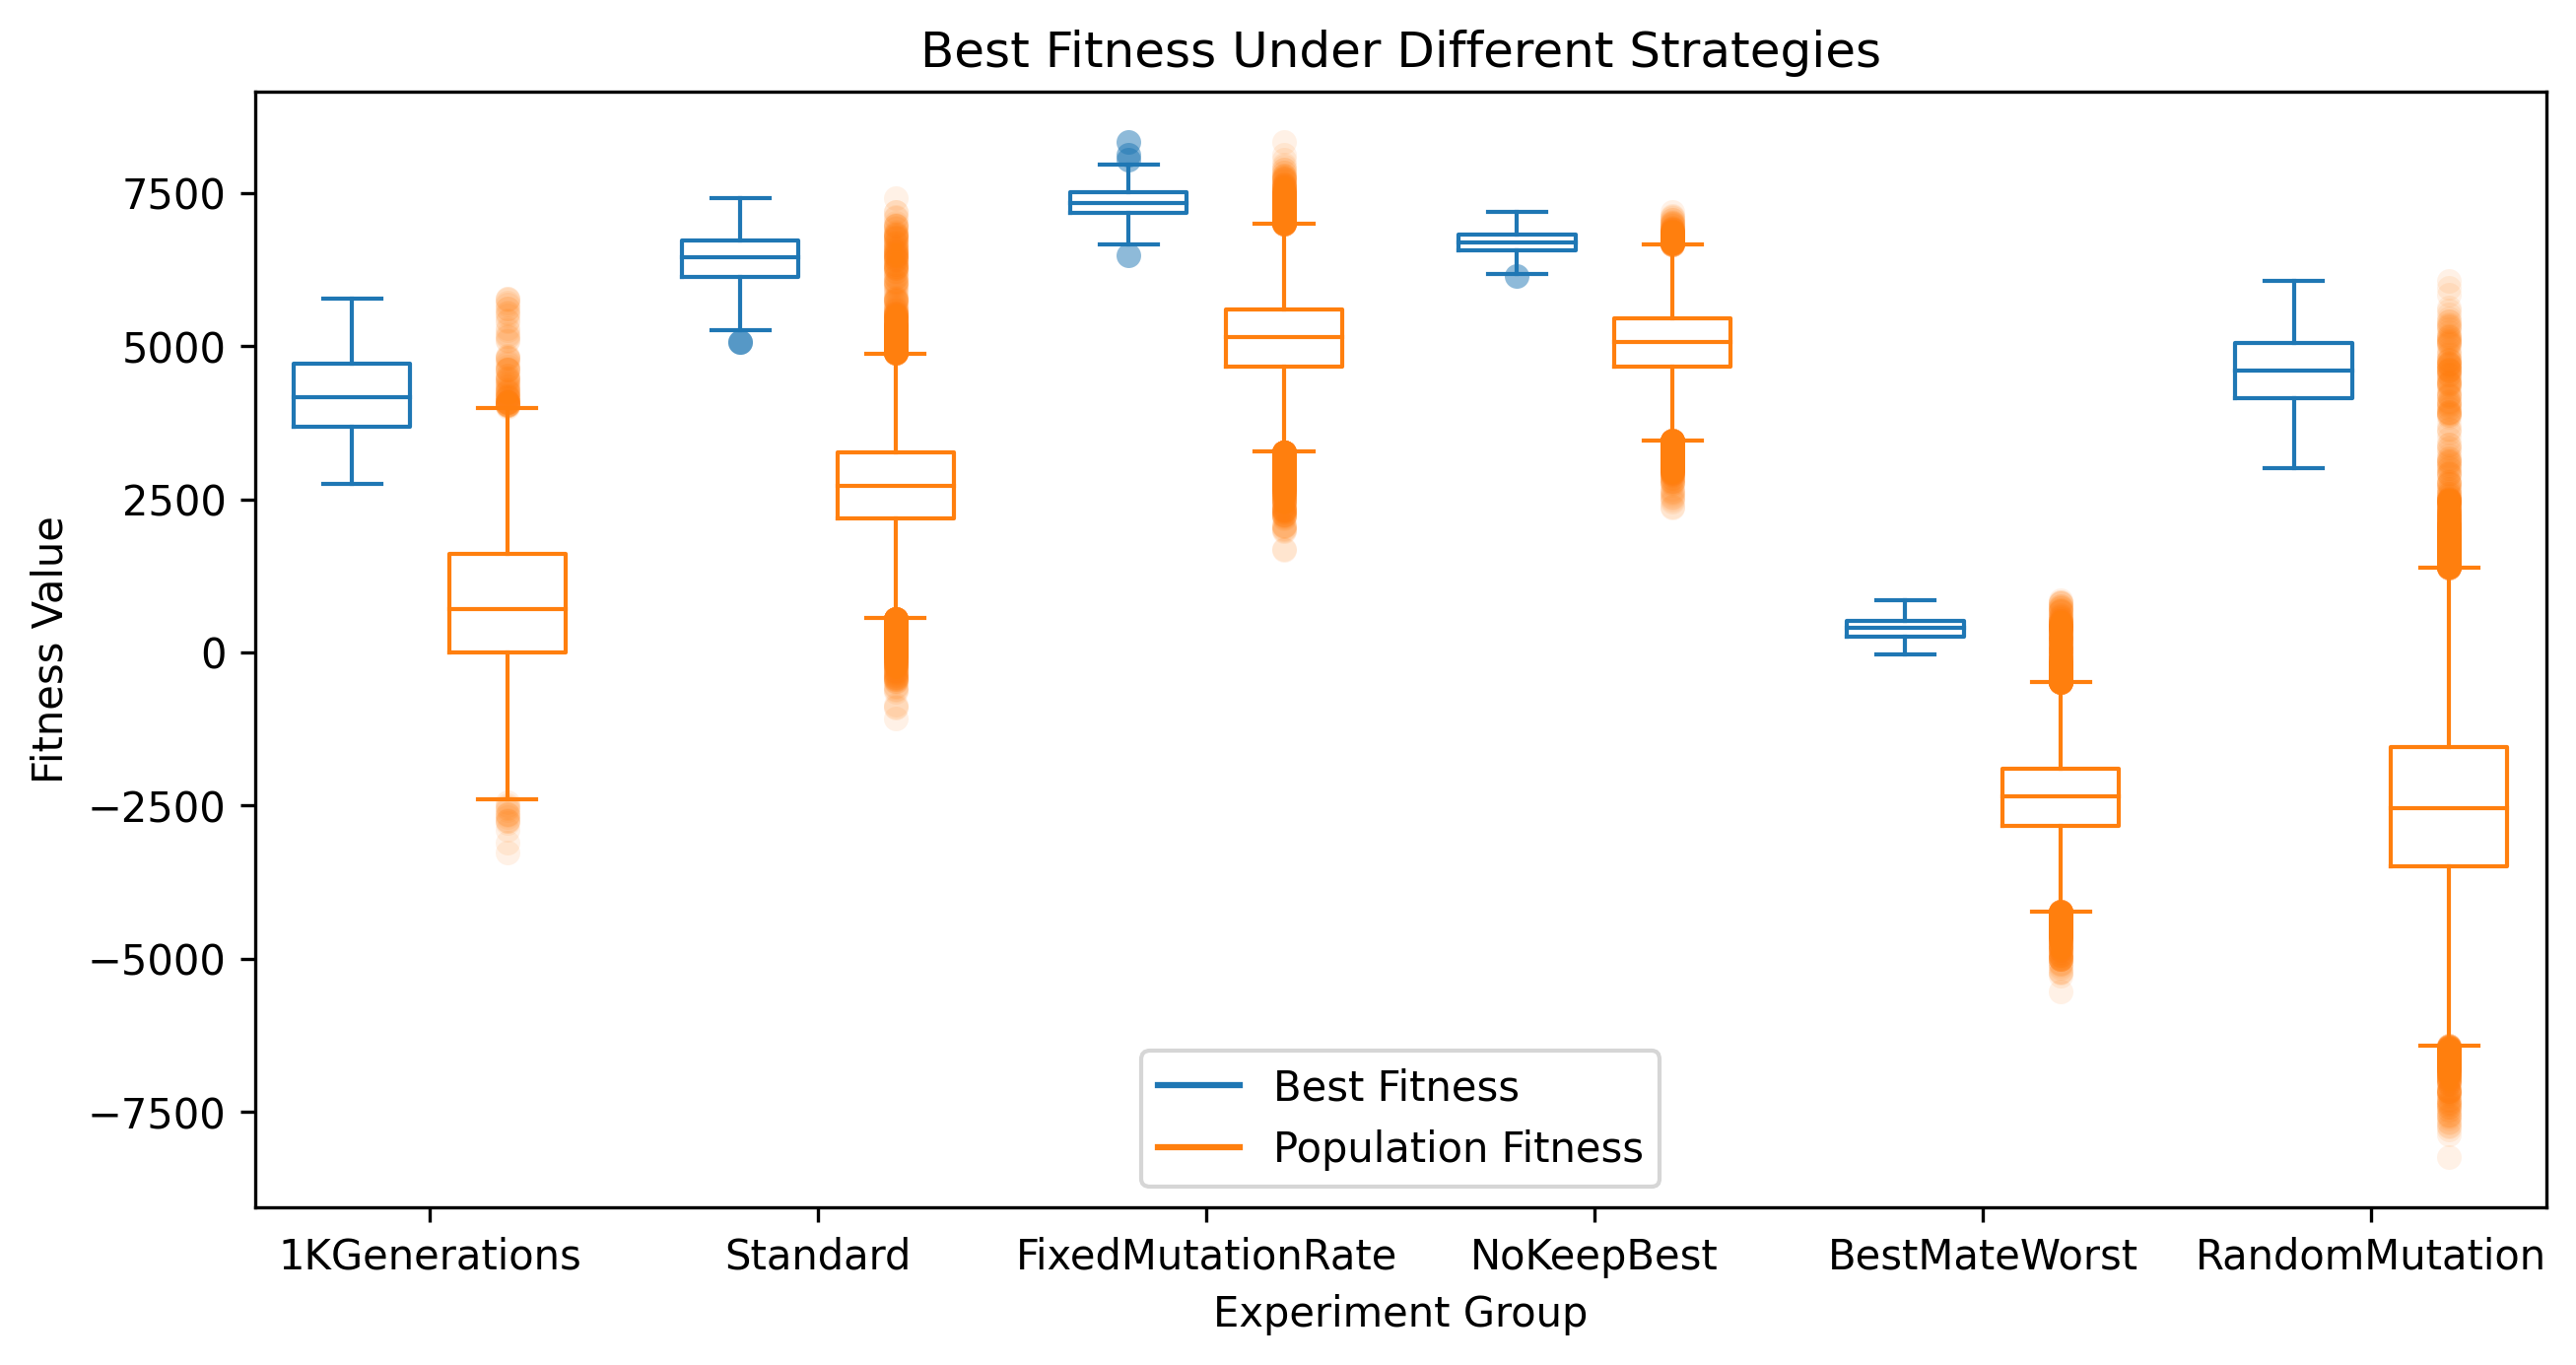

In [72]:
# Boxplot of best fitness and all fitness
def set_box_color(bp, color):
    plt.setp(bp["boxes"], color=color)
    plt.setp(bp["whiskers"], color=color)
    plt.setp(bp["caps"], color=color)
    plt.setp(bp["medians"], color=color)
    plt.setp(bp["fliers"], color=color)


blue_flier = dict(
    marker="o", markerfacecolor="tab:blue", markeredgecolor="none", alpha=0.5
)
orange_flier = dict(
    marker="o", markerfacecolor="tab:orange", markeredgecolor="none", alpha=0.1
)

fig = plt.figure(figsize=(10, 5), dpi=300)
bpl = plt.boxplot(
    [v for k, v in best_fitness.items()],
    # labels=list(best_fitness.keys()),
    labels=[""] * len(best_fitness),
    positions=np.array(range(len(last_iter_fitness))) * 2.0 - 0.4,
    widths=0.6,
    flierprops=blue_flier,
)
bpr = plt.boxplot(
    [v.flatten() for k, v in last_iter_fitness.items()],
    # labels=list(last_iter_fitness.keys()),
    labels=[""] * len(best_fitness),
    positions=np.array(range(len(last_iter_fitness))) * 2.0 + 0.4,
    widths=0.6,
    flierprops=orange_flier,
)
set_box_color(bpl, "tab:blue")
set_box_color(bpr, "tab:orange")
plt.plot([], c="tab:blue", label="Best Fitness")
plt.plot([], c="tab:orange", label="Population Fitness")
plt.xticks(
    list(range(0, len(last_iter_fitness) * 2, 2)), list(last_iter_fitness.keys())
)
plt.xlabel("Experiment Group")
plt.ylabel("Fitness Value")
plt.title("Best Fitness Under Different Strategies")
plt.legend(loc="lower center")
plt.savefig("StrategyComparison.png")
plt.show()
